In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import spatial
import os
import openpyxl
import requests
from zipfile import ZipFile  #assist in unzipping files
import gzip
from PIL import Image
import matplotlib.colors as mcolors
import random
import rle

In [30]:
#Change the working directory
os.chdir("C:/Users/HP/Desktop/Syngenta/Jun-Aug 2021/Mapping Codes/Python Mapping Test/")

#Define where the map ".rds" file is stored
mapsfolder = "C:/Users/HP/Desktop/Syngenta/Jun-Aug 2021/Mapping Codes/Python Mapping Test/Maps Folder/"

In [31]:
url = "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_KEN_shp.zip"

r = requests.get(url)
filename = mapsfolder + "Data.zip"
with open(filename, "wb") as f:
    f.write(r.content)

In [32]:
os.chdir("C:/Users/HP/Desktop/Syngenta/Jun-Aug 2021/Mapping Codes/Python Mapping Test/Maps Folder/")
with ZipFile('Data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [33]:
if os.path.exists(filename):
    os.remove(filename)
else:
    raise Exception("file does not exist!")

In [76]:
country_boundaries = gpd.read_file("gadm36_KEN_0.shp")
country_data = country_boundaries.drop("geometry", axis=1)
country = country_data["NAME_0"]

In [54]:
county_boundaries = gpd.read_file("gadm36_KEN_1.shp")
county_data = county_boundaries.drop("geometry", axis=1)
counties = county_data["NAME_1"]

In [55]:
constituency_boundaries = gpd.read_file("gadm36_KEN_2.shp")
constituency_data = constituency_boundaries.drop("geometry", axis=1)
constituencies = constituency_data["NAME_2"]

In [56]:
ward_boundaries = gpd.read_file("gadm36_KEN_3.shp")
ward_data = ward_boundaries.drop("geometry", axis=1)
wards = ward_data["NAME_3"]

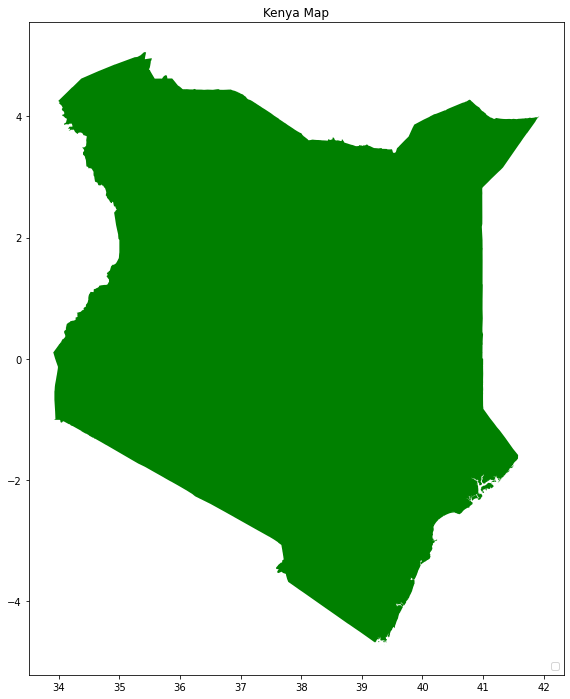

In [79]:
fig, ax = plt.subplots(1, figsize =(16, 8))
country_boundaries.plot(ax = ax, color ='green')
ax.set_title("Kenya Map")
plt.legend(country, loc="lower right")
plt.savefig('KenyaCountry.png', dpi=300, bbox_inches='tight')
plt.show()

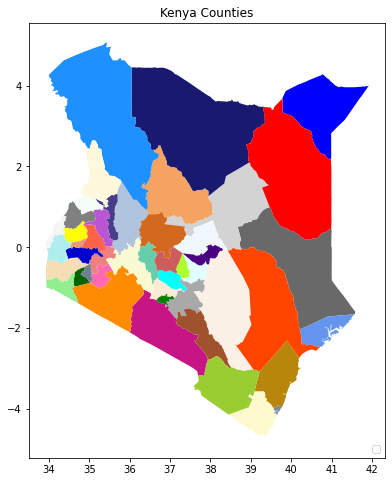

In [137]:
mycolours_counties = random.sample(list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)), k=len(counties))
fig, ax = plt.subplots(1, figsize =(16, 8))
county_boundaries.plot(ax = ax, color =mycolours_counties)
ax.set_title("Kenya Counties")
plt.legend(counties, loc="lower right")
plt.savefig('KenyaCounties.png', dpi=300, bbox_inches='tight')
plt.show()

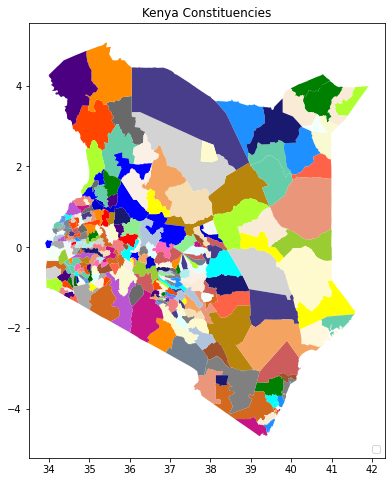

In [162]:
rl = rle.encode(constituencies_data["NAME_1"])
df = pd.DataFrame(rl)
lengths=df.loc[1]
mycolours_constituencies = np.repeat(mycolours_counties, lengths)

fig, ax = plt.subplots(1, figsize =(16, 8))
constituency_boundaries.plot(ax = ax, color =mycolours_constituencies)
ax.set_title("Kenya Constituencies")
plt.legend(constituencies, loc="lower right")
plt.savefig('KenyaConstituencies.png', dpi=300, bbox_inches='tight')
plt.show()

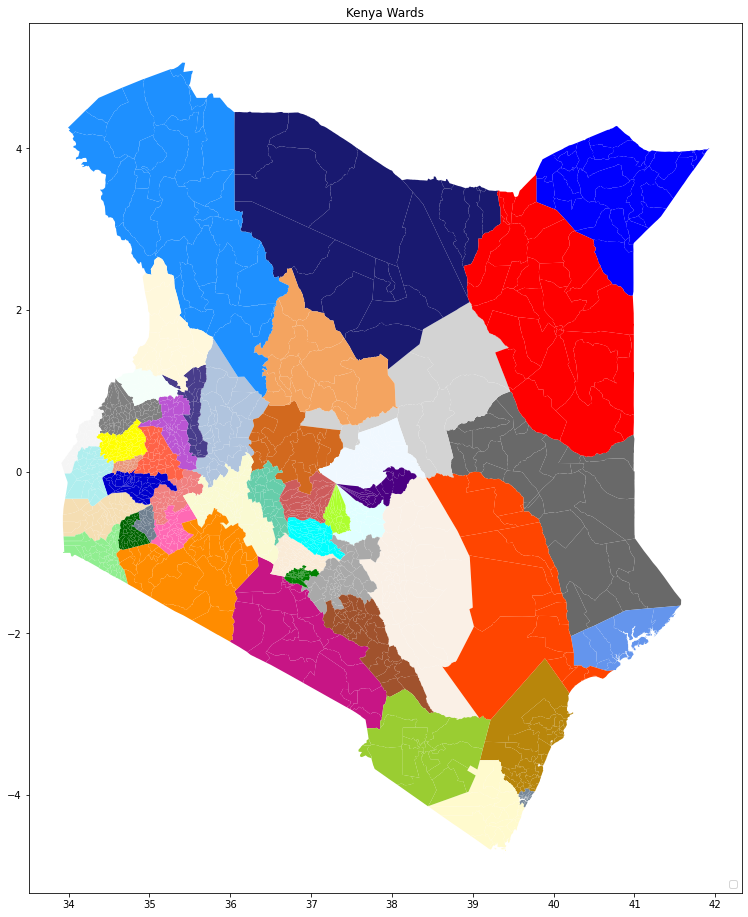

In [180]:
rl = rle.encode(ward_data["NAME_1"])
df = pd.DataFrame(rl)
lengths=df.loc[1]
mycolours_wards = np.repeat(mycolours_counties, lengths)

fig, ax = plt.subplots(1, figsize =(16, 16))
ward_boundaries.plot(ax = ax, color = mycolours_wards)
ax.set_title("Kenya Wards")
plt.legend([counties], loc="lower right")
plt.savefig('KenyaWards.png', dpi=300, bbox_inches='tight')
plt.show()

In [190]:
gm = country_boundaries.loc[0,'geometry']

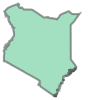

In [191]:
gm

In [200]:
ck = np.array(gm[1].exterior)

In [201]:
len(ck)

39

In [216]:
polygons = list(gm)
type(polygons)

list

In [315]:
len(polygons)

77

In [271]:
country_geom = country_boundaries.loc[0,'geometry']
country_polygons = list(country_geom)

country_GPS = pd.DataFrame()
for i in range(len(country_polygons)):
    polygons_GPS = pd.DataFrame()
    country_poly_poly = list(country_polygons)
    for j in range(len(country_poly_poly)):
        polygonGPS = np.array(country_poly_poly[j].exterior)
        polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
        country = np.repeat("Kenya", polygonGPS.shape[0])
        kenyapoly = "Kenya" + str(i) + "Polygon" + str(j)
        CountryPolygon = np.repeat(kenyapoly, polygonGPS.shape[0])
        polygonGPS["country"] = country
        polygonGPS["CountryPolygon"] = CountryPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
    country_GPS = pd.concat([country_GPS, polygon_GPS])
    
country_GPS.to_csv("country_GPS.csv")

In [273]:
country_GPS.to_csv("country_GPS.csv")

In [296]:
#Determine 10km Pixels In Each Country Pixel
grid = pd.read_csv('C:/Users/HP/Desktop/Syngenta/Jun-Aug 2021/PythonAssignments/ARC2PROCESSING/grid.csv')

grid["PixelID"] = str(grid["PixelID"])

grid["Latitude"] = grid["Latitude"].apply(str)
grid["Latitude"] = grid["Latitude"].apply(float)

grid["Longitude"] = grid["Longitude"].apply(str)
grid["Longitude"] = grid["Longitude"].apply(float)

grid["PixelNames"] = grid["PixelNames"].apply(str)

In [290]:
Country = np.repeat("NA", grid.shape[0])
countrypolygons = str(country_GPS["CountryPolygon"].drop_duplicates)
for countrypolygon in countrypolygons:
    countrypolygonGPS = country_GPS.loc[np.where(country_GPS["CountryPolygon"] == countrypolygon)]
    

In [313]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
for countrypolygon in countrypolygons:
    countrypolygonGPS = country_GPS.loc[np.where(country_GPS["CountryPolygon"] == countrypolygon)]
    coord = Point(np.array(grid["Longitude"], grid["Latitude"]))
    poly = Polygon(countrypolygonGPS["Longitude"], countrypolygonGPS["Latitude"])
    points = poly.contains(coord)


In [320]:
#Determine the polygons per county
county_geom = county_boundaries.loc[0,'geometry']
county_polygons = list(county_geom)

county_GPS = pd.DataFrame()
for i in np.arange(len(county_polygons)):
    polygons_GPS = pd.DataFrame()
    county_poly_poly = list(county_polygons)
    for j in np.arange(len(county_poly_poly)):
        polygonGPS = np.array(county_poly_poly[j].exterior)
        polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
        county = np.repeat(counties.loc[i], polygonGPS.shape[0])
        county_poly = counties.loc[i] + str(i) + "Polygon" + str(j)
        CountyPolygon = np.repeat(county_poly, polygonGPS.shape[0])
        polygonGPS["county"] = county
        polygonGPS["CountyPolygon"] = CountyPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
    county_GPS = pd.concat([county_GPS, polygon_GPS])
        
county_GPS.to_csv("county_GPS.csv")   

In [ ]:
#Determine the pixels per constituency
constituency_geom = constituency_boundaries.loc[0,'geometry']
constituency_polygons = list(constituency_geom)

constituency_GPS = pd.DataFrame()
for i in np.arange(len(constituency_polygons)):
    polygons_GPS = pd.DataFrame()
    constituency_poly_poly = list(constituency_polygons)
    for j in np.arange(len(constituency_poly_poly)):
        polygonGPS = np.array(constituency_poly_poly[j].exterior)
        polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
        constituency = np.repeat(constituencies.loc[i], polygonGPS.shape[0])
        constituency_poly = constituencies.loc[i] + str(i) + "Polygon" + str(j)
        ConstuencyPolygon = np.repeat(constituency_poly, polygonGPS.shape[0])
        polygonGPS["constituency"] = constituency
        polygonGPS["ConstituencyPolygon"] = ConstituencyPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
    constituency_GPS = pd.concat([constituency_GPS, polygon_GPS])
        
constituency_GPS.to_csv("constituency_GPS.csv")   

In [324]:
for k in range(len(constituencies)):
    constituency_geom = constituency_boundaries.loc[k,'geometry']
    constituency_polygons = list(constituency_geom)

    constituency_GPS = pd.DataFrame()
    for i in np.arange(len(constituency_polygons)):
        polygons_GPS = pd.DataFrame()
        constituency_poly_poly = list(constituency_polygons)
        for j in np.arange(len(constituency_poly_poly)):
            polygonGPS = np.array(constituency_poly_poly[j].exterior)
            polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
            constituency = np.repeat(constituencies.loc[i], polygonGPS.shape[0])
            constituency_poly = constituencies.loc[i] + str(i) + "Polygon" + str(j)
            ConstuencyPolygon = np.repeat(constituency_poly, polygonGPS.shape[0])
            polygonGPS["constituency"] = constituency
            polygonGPS["ConstituencyPolygon"] = ConstituencyPolygon
            polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
        constituency_GPS = pd.concat([constituency_GPS, polygon_GPS])
        
constituency_GPS.to_csv("constituency_GPS.csv")   

TypeError: 'Polygon' object is not iterable

In [306]:
pip install turfpy

  Created wheel for turfpy: filename=turfpy-0.0.6-py3-none-any.whl size=38011 sha256=1cd0a14e9eb8c25a844243facb50001e4fd608736078c6e8e54d3cf3deddf4a8
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b5\85\02\220fb2b91d6828336f6eb995a499bcc04980946de4428c64be
Successfully built turfpy
Note: you may need to restart the kernel to use updated packages.


In [307]:
from turfpy.measurement import boolean_point_in_polygon
boolean_point_in_polygon(coord, poly)

Exception: polygon is required

In [335]:
geo = []
for k in range(len(constituencies)):
    constituency_geom = constituency_boundaries.loc[k,'geometry']
    geo.append(constituency_geom)
const = list(geo)
constituency_polygons = const

constituency_GPS = pd.DataFrame()
for i in np.arange(len(constituency_polygons)):
    polygons_GPS = pd.DataFrame()
    constituency_poly_poly = list(constituency_polygons)
    for j in np.arange(len(constituency_poly_poly)):
        polygonGPS = np.array(constituency_poly_poly[j].exterior)
        polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
        constituency = np.repeat(constituencies.loc[i], polygonGPS.shape[0])
        constituency_poly = constituencies.loc[i] + str(i) + "Polygon" + str(j)
        ConstituencyPolygon = np.repeat(constituency_poly, polygonGPS.shape[0])
        polygonGPS["constituency"] = constituency
        polygonGPS["ConstituencyPolygon"] = ConstituencyPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
    constituency_GPS = pd.concat([constituency_GPS, polygon_GPS])
        
constituency_GPS.to_csv("constituency_GPS.csv")   

In [337]:
len(constituency_poly_poly)

301

In [338]:
len(const)

301

In [349]:
for i in range(6):
    polygonGPS = np.array(constituency_poly_poly[6].exterior)
    

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

In [348]:
len(polygonGPS)

2264

In [350]:
polygonGPS = np.array(constituency_poly_poly[6].exterior)

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

In [ ]:
geom = constituency_boundaries.pop('geometry')
geom = geom.apply(lambda x: list(x) if isinstance(x, MultiPolygon) else x).explode())
NA_rain = NA_rain.join(geom, how='inner')

In [356]:
geom = constituency_boundaries.pop('geometry')
geom = geom.apply(lambda x: list(x) if isinstance(x, sg.MultiPolygon) else x).explode()

KeyError: 'geometry'

In [354]:
import shapely.geometry as sg

In [357]:
geom = constituency_poly_poly.apply(lambda x: list(x) if isinstance(x, sg.MultiPolygon) else x).explode()

AttributeError: 'list' object has no attribute 'apply'